## 기본 라이브러리 불러오기

In [758]:
# 라이브러리 임포트
import os
import numpy as np
import pandas as pd
import chardet

# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기

pd.set_option('display.max_column', None)

import time

import ExcelFile_Merge as em
import ExcelFile_Read as er
import ExcelFile_EDA as ee

## 기본 데이터 불러오기

### 서울특별시 공공자전거 대여이력 정보

In [380]:
start_time = time.time()
_columns = ['자전거번호', '대여일자', '대여시간차', '대여대여소번호', '반납대여소번호', '이용시간(분)', '이용거리(M)']
df_BikeRent_2023 = pd.read_parquet('G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\서울특별시 공공자전거 대여이력 정보_2023_preprocessed.parquet', columns = _columns)
print("read_csv time :", time.time() - start_time)

read_csv time : 13.030431032180786


In [381]:
start_time = time.time()
_columns = ['자전거번호', '대여일자', '대여시간차', '대여대여소번호', '반납대여소번호', '이용시간(분)', '이용거리(M)']
df_BikeRent_2024 = pd.read_parquet('G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\서울특별시 공공자전거 대여이력 정보_2024_preprocessed.parquet', columns = _columns)
print("read_csv time :", time.time() - start_time)

read_csv time : 6.139447927474976


### 23년,24년 데이터 합치기

In [384]:
df_BikeRent = pd.concat([df_BikeRent_2023, df_BikeRent_2024], axis=0)

In [385]:
print(f'df_BikeRent_2023.shape[0] : {df_BikeRent_2023.shape[0]}')
print(f'df_BikeRent_2024.shape[0] : {df_BikeRent_2024.shape[0]}')
print(f'df_BikeRent.shape[0] : {df_BikeRent.shape[0]}')

df_BikeRent_2023.shape[0] : 45363848
df_BikeRent_2024.shape[0] : 21621807
df_BikeRent.shape[0] : 66985655


In [388]:
df_BikeRent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66985655 entries, 0 to 22107539
Data columns (total 7 columns):
 #   Column   Dtype          
---  ------   -----          
 0   자전거번호    object         
 1   대여일자     object         
 2   대여시간차    timedelta64[ns]
 3   대여대여소번호  object         
 4   반납대여소번호  object         
 5   이용시간(분)  int64          
 6   이용거리(M)  float64        
dtypes: float64(1), int64(1), object(4), timedelta64[ns](1)
memory usage: 4.0+ GB


In [390]:
df_BikeRent.head(2)

,자전거번호,대여일자,대여시간차,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M)
0,SPB-39194,2023-01-01,0 days 00:00:30,01554,01554,0,0.0
1,SPB-43457,2023-01-01,0 days 00:02:08,01653,04003,2,0.0


---
### df_BikeRent 의 데이터를 조건에 재조회
- 대여시간차가 5분 미만인 데이터
- 대여 대여소 번호와 반납 대여소 번호가 동일한 데이터

In [393]:
# 대여일자를 날짜 형식으로 변환
df_BikeRent['대여일자'] = pd.to_datetime(df_BikeRent['대여일자'])

In [394]:
# 2023.09.01 ~ 2024.06.30
# 이상패턴 횟수 - 조회용
df_BikeRent230901_240630 = df_BikeRent[df_BikeRent['대여일자'].between('2023-09-01', '2024-06-30')]
# 2024.01.01 ~ 2024.06.30
# 정상 자전거번호 확인용
df_BikeRent240101_240630 = df_BikeRent[df_BikeRent['대여일자'].between('2024-01-01', '2024-06-30')]

In [397]:
print(f'df_BikeRent230901_240630.shape[0] : {df_BikeRent230901_240630.shape[0]}')
print(f'df_BikeRent240101_240630.shape[0] : {df_BikeRent240101_240630.shape[0]}')

df_BikeRent230901_240630.shape[0] : 37176899
df_BikeRent240101_240630.shape[0] : 21621807


---
### 서울시 공공자전거 고장신고 내역

In [400]:
start_time = time.time()
df_BikeBroken = pd.read_parquet('G:\\내 드라이브\\DataSet\\_최종 병합 파일\\서울시 공공자전거 고장신고 내역_15-24.06.parquet')
print("read_csv time :", time.time() - start_time)

read_csv time : 2.6409881114959717


In [402]:
df_BikeBroken.head(3)

,자전거번호,고장구분,등록일자,등록시간
0,SPB-00108,체인,2015-12-04,07:41:01
1,SPB-00210,체인,2015-12-07,12:23:33
2,SPB-00035,기타,2015-12-09,17:07:00


In [404]:
df_BikeBroken.shape[0]

767715

---
### 2024년 고장이력만 조회
- 등록일자 : 2024-01-01 ~ 2024-06-30

In [407]:
df_BikeBroken2 = df_BikeBroken[df_BikeBroken['등록일자'].between('2024-01-01', '2024-12-31')]

In [409]:
print(f'df_BikeBroken.shape[0] {df_BikeBroken.shape[0]}')
print(f'df_BikeBroken2.shape[0] {df_BikeBroken2.shape[0]}')

df_BikeBroken.shape[0] 767715
df_BikeBroken2.shape[0] 76463


In [411]:
df_BikeBroken2['자전거번호'].unique()

<StringArray>
['SPB-40704', 'SPB-65171', 'SPB-44316', 'SPB-31539', 'SPB-51998', 'SPB-38568',
 'SPB-68235', 'SPB-44078', 'SPB-66158', 'SPB-45102',
 ...
 'SPB-64200', 'SPB-42922', 'SPB-69655', 'SPB-39650', 'SPB-38653', 'SPB-62989',
 'SPB-31854', 'SPB-62325', 'SPB-62654', 'SPB-35527']
Length: 28589, dtype: string

In [413]:
df_BikeBroken2['자전거번호'].value_counts()

자전거번호
SPB-30296    24
SPB-70298    23
SPB-31172    21
SPB-41406    21
SPB-33626    19
             ..
SPB-60257     1
SPB-40210     1
SPB-59161     1
SPB-32403     1
SPB-35527     1
Name: count, Length: 28589, dtype: Int64

In [415]:
# 2024-01-01 ~ 2024-06-30	
df_BikeBroken2.sort_values(by = '등록일자', ascending = True).head(2)

,자전거번호,고장구분,등록일자,등록시간
691252,SPB-40704,단말기,2024-01-01,03:57:03
691351,SPB-66424,체인,2024-01-01,18:45:08


In [417]:
df_BikeBroken2[df_BikeBroken2['자전거번호'] == 'SPB-30296'].sort_values(by = '등록일자', ascending = False).head(2)

,자전거번호,고장구분,등록일자,등록시간
752797,SPB-30296,기타,2024-06-06,14:51:27
752796,SPB-30296,체인,2024-06-06,14:51:27


---
### 자전거고장신고내역에서
- 자전거번호' 별로 가장마지막 신고내역만 가져오기

In [420]:
# 등록일자를 datetime 형식으로 변환
df_BikeBroken2['등록일자'] = pd.to_datetime(df_BikeBroken2['등록일자'])

# 자전거번호 별로 가장 최근 등록일자를 가진 행 추출
df_BikeBroken_latest = df_BikeBroken2.loc[df_BikeBroken2.groupby('자전거번호')['등록일자'].idxmax()]

# 이전일자 컬럼 생성 (등록일자보다 한 달 전)
df_BikeBroken_latest['이전일자_1mon'] = df_BikeBroken_latest['등록일자'] - pd.DateOffset(months=1)
df_BikeBroken_latest['이전일자_2mon'] = df_BikeBroken_latest['등록일자'] - pd.DateOffset(months=2)
df_BikeBroken_latest['이전일자_3mon'] = df_BikeBroken_latest['등록일자'] - pd.DateOffset(months=3)

C:\Users\user\AppData\Local\Temp\ipykernel_6524\3450085564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BikeBroken2['등록일자'] = pd.to_datetime(df_BikeBroken2['등록일자'])


In [422]:
df_BikeBroken_latest.head(2)

,자전거번호,고장구분,등록일자,등록시간,이전일자_1mon,이전일자_2mon,이전일자_3mon
714016,SPB-30006,페달,2024-03-31,23:48:49,2024-02-29,2024-01-31,2023-12-31
760656,SPB-30010,타이어,2024-06-18,18:37:09,2024-05-18,2024-04-18,2024-03-18


In [424]:
df_BikeBroken_latest = df_BikeBroken_latest[['자전거번호', '고장구분', '이전일자_1mon', '이전일자_2mon', '이전일자_3mon', '등록일자']]

In [426]:
df_BikeBroken_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록일자
714016,SPB-30006,페달,2024-02-29,2024-01-31,2023-12-31,2024-03-31
760656,SPB-30010,타이어,2024-05-18,2024-04-18,2024-03-18,2024-06-18


#### 고장난 자전기 가져오기

In [429]:
df_BikeBroken_latest['자전거번호'].unique()

<StringArray>
['SPB-30006', 'SPB-30010', 'SPB-30014', 'SPB-30018', 'SPB-30022', 'SPB-30024',
 'SPB-30026', 'SPB-30031', 'SPB-30036', 'SPB-30037',
 ...
 'SPB-84955', 'SPB-84963', 'SPB-84968', 'SPB-84974', 'SPB-84984', 'SPB-84988',
 'SPB-84989', 'SPB-84993', 'SPB-84995', 'SPB-84996']
Length: 28589, dtype: string

In [431]:
df_BikeBroken_latest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28589 entries, 714016 to 737981
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자전거번호      28589 non-null  string        
 1   고장구분       28589 non-null  string        
 2   이전일자_1mon  28589 non-null  datetime64[ns]
 3   이전일자_2mon  28589 non-null  datetime64[ns]
 4   이전일자_3mon  28589 non-null  datetime64[ns]
 5   등록일자       28589 non-null  datetime64[ns]
dtypes: datetime64[ns](4), string(2)
memory usage: 1.5 MB


In [433]:
# 2024.01.01 ~ 2024.06.30 사이에 있는 자전거 대여이력에서 고장이 아닌 자전거 번호 조회
df_BikeRent2 = df_BikeRent240101_240630[~df_BikeRent240101_240630['자전거번호'].isin(df_BikeBroken_latest['자전거번호'].unique())]

In [434]:
df_BikeRent2['자전거번호'].count()

4855582

In [437]:
df_BikeRent2.head(2)

,자전거번호,대여일자,대여시간차,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M)
8,SPB-80304,2024-01-01,0 days 00:01:55,00214,00213,1,200.00
22,SPB-32497,2024-01-01,0 days 00:05:00,04674,04659,5,982.45


In [439]:
# 등록일자를 datetime 형식으로 변환
df_BikeRent2['대여일자'] = pd.to_datetime(df_BikeRent2['대여일자'])

# 자전거번호 별로 가장 최근 등록일자를 가진 행 추출
df_BikeRent_latest = df_BikeRent2.loc[df_BikeRent2.groupby('자전거번호')['대여일자'].idxmax()]

# 이전일자 컬럼 생성 (등록일자보다 한 달 전)
df_BikeRent_latest['이전일자_1mon'] = df_BikeRent_latest['대여일자'] - pd.DateOffset(months=1)
df_BikeRent_latest['이전일자_2mon'] = df_BikeRent_latest['대여일자'] - pd.DateOffset(months=2)
df_BikeRent_latest['이전일자_3mon'] = df_BikeRent_latest['대여일자'] - pd.DateOffset(months=3)

C:\Users\user\AppData\Local\Temp\ipykernel_6524\2979067368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BikeRent2['대여일자'] = pd.to_datetime(df_BikeRent2['대여일자'])


In [441]:
df_BikeRent_latest.head(2)

,자전거번호,대여일자,대여시간차,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M),이전일자_1mon,이전일자_2mon,이전일자_3mon
21756509,SPB-30001,2024-06-28,0 days 00:01:35,03798,01174,1,0.00,2024-05-28,2024-04-28,2024-03-28
14976293,SPB-30008,2024-05-20,0 days 00:21:21,03920,00785,21,3419.51,2024-04-20,2024-03-20,2024-02-20


In [443]:
df_BikeRent_latest.shape[0]

13307

### 대여이력 <=> 고장내역 - 컬럼이름 맞춰주기

In [446]:
df_BikeBroken_latest.columns

Index(['자전거번호', '고장구분', '이전일자_1mon', '이전일자_2mon', '이전일자_3mon', '등록일자'], dtype='object')

In [448]:
df_BikeRent_latest.columns

Index(['자전거번호', '대여일자', '대여시간차', '대여대여소번호', '반납대여소번호', '이용시간(분)', '이용거리(M)',
       '이전일자_1mon', '이전일자_2mon', '이전일자_3mon'],
      dtype='object')

In [450]:
df_BikeRent_latest['고장구분'] = ''

In [452]:
df_BikeBroken_latest.rename(columns = {'등록일자':'등록대여일자'}, inplace = True)
df_BikeRent_latest.rename(columns = {'대여일자':'등록대여일자'}, inplace = True)

In [454]:
df_BikeBroken_latest = df_BikeBroken_latest[['자전거번호', '고장구분', '이전일자_1mon', '이전일자_2mon', '이전일자_3mon', '등록대여일자']]
df_BikeRent_latest = df_BikeRent_latest[['자전거번호', '고장구분', '이전일자_1mon', '이전일자_2mon', '이전일자_3mon', '등록대여일자']]

In [456]:
df_BikeBroken_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자
714016,SPB-30006,페달,2024-02-29,2024-01-31,2023-12-31,2024-03-31
760656,SPB-30010,타이어,2024-05-18,2024-04-18,2024-03-18,2024-06-18


In [458]:
df_BikeRent_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자
21756509,SPB-30001,,2024-05-28,2024-04-28,2024-03-28,2024-06-28
14976293,SPB-30008,,2024-04-20,2024-03-20,2024-02-20,2024-05-20


---
### 고장여부 - 컬럼 생성

In [461]:
df_BikeBroken_latest['고장여부'] = 1
df_BikeRent_latest['고장여부'] = 0

In [463]:
df_BikeBroken_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부
714016,SPB-30006,페달,2024-02-29,2024-01-31,2023-12-31,2024-03-31,1
760656,SPB-30010,타이어,2024-05-18,2024-04-18,2024-03-18,2024-06-18,1


In [465]:
df_BikeRent_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부
21756509,SPB-30001,,2024-05-28,2024-04-28,2024-03-28,2024-06-28,0
14976293,SPB-30008,,2024-04-20,2024-03-20,2024-02-20,2024-05-20,0


In [467]:
print(f'df_BikeBroken_latest.shape[0] : {df_BikeBroken_latest.shape[0]}')
print(f'df_BikeRent_latest.shape[0] : {df_BikeRent_latest.shape[0]}')

df_BikeBroken_latest.shape[0] : 28589
df_BikeRent_latest.shape[0] : 13307


---
### 자전거(고장) - 자전거(일반) 합치기

In [470]:
df_Bike_latest = pd.concat([df_BikeBroken_latest, df_BikeRent_latest], axis=0)

In [472]:
print(f'df_BikeBroken_latest.shape[0] : {df_BikeBroken_latest.shape[0]}')
print(f'df_BikeRent_latest.shape[0] : {df_BikeRent_latest.shape[0]}')
print(f'df_Bike_latest.shape[0] : {df_Bike_latest.shape[0]}')

df_BikeBroken_latest.shape[0] : 28589
df_BikeRent_latest.shape[0] : 13307
df_Bike_latest.shape[0] : 41896


In [474]:
df_Bike_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부
714016,SPB-30006,페달,2024-02-29,2024-01-31,2023-12-31,2024-03-31,1
760656,SPB-30010,타이어,2024-05-18,2024-04-18,2024-03-18,2024-06-18,1


In [476]:
df_Bike_latest['고장여부'].value_counts()

고장여부
1    28589
0    13307
Name: count, dtype: int64

In [478]:
df_BikeRent230901_240630.head()

,자전거번호,대여일자,대여시간차,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M)
30476802,SPB-45718,2023-09-01,0 days 00:00:13,02213,02213,0,0.0
30476803,SPB-63096,2023-09-01,0 days 00:00:29,00838,00838,0,0.0
30476804,SPB-49019,2023-09-01,0 days 00:01:35,00431,04798,1,230.0
30476805,SPB-53749,2023-09-01,0 days 00:00:03,03819,03819,0,0.0
30476806,SPB-82988,2023-09-01,0 days 00:01:08,00389,00473,1,160.0


In [480]:
print(f'df_Bike_latest.shape[0] : {df_Bike_latest.shape[0]}')

# print(f'df_BikeRent230901_240630_5min.shape[0] : {df_BikeRent230901_240630_5min.shape[0]}')
# print(f'df_BikeRent230901_240630_7min.shape[0] : {df_BikeRent230901_240630_7min.shape[0]}')
# print(f'df_BikeRent230901_240630_10min.shape[0] : {df_BikeRent230901_240630_10min.shape[0]}')

print(f'df_BikeRent230901_240630.shape[0] : {df_BikeRent230901_240630.shape[0]}')
print(f'df_Bike_latest.shape[0] : {df_Bike_latest.shape[0]}')
print(f'df_Bike_latest.shape[0] : {df_Bike_latest.shape[0]}')

df_Bike_latest.shape[0] : 41896
df_BikeRent230901_240630.shape[0] : 37176899
df_Bike_latest.shape[0] : 41896
df_Bike_latest.shape[0] : 41896


In [482]:
df_Bike_latest.head()

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부
714016,SPB-30006,페달,2024-02-29,2024-01-31,2023-12-31,2024-03-31,1
760656,SPB-30010,타이어,2024-05-18,2024-04-18,2024-03-18,2024-06-18,1
763779,SPB-30014,기타,2024-05-24,2024-04-24,2024-03-24,2024-06-24,1
749636,SPB-30018,기타,2024-05-01,2024-04-01,2024-03-01,2024-06-01,1
741124,SPB-30022,기타,2024-04-20,2024-03-20,2024-02-20,2024-05-20,1


In [484]:
df_BikeRent230901_240630['자전거번호'].isin(df_Bike_latest['자전거번호']).shape[0]

37176899

In [498]:
df_BikeRent230901_240630.head()

,자전거번호,대여일자,대여시간차,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M)
30476802,SPB-45718,2023-09-01,0 days 00:00:13,02213,02213,0,0.0
30476803,SPB-63096,2023-09-01,0 days 00:00:29,00838,00838,0,0.0
30476804,SPB-49019,2023-09-01,0 days 00:01:35,00431,04798,1,230.0
30476805,SPB-53749,2023-09-01,0 days 00:00:03,03819,03819,0,0.0
30476806,SPB-82988,2023-09-01,0 days 00:01:08,00389,00473,1,160.0


In [500]:
df_BikeRent230901_240630 = df_BikeRent230901_240630.groupby(['자전거번호', '대여일자']).agg({
    '이용거리(M)': ['sum'],             # 이용거리의 합계
    '이용시간(분)': ['sum'],            # 이용시간의 합계
    '대여일자': ['count']               # 이용횟수
    }).reset_index()

In [502]:
df_BikeRent230901_240630.shape[0]

6928434

In [504]:
df_BikeRent230901_240630.head(4)

,자전거번호,대여일자,이용거리(M),이용시간(분),대여일자
,,,sum,sum,count
0,SPB-30001,2023-09-01,42995.90,366,12
1,SPB-30001,2023-09-02,3255.36,17,2
2,SPB-30001,2023-09-03,2298.96,11,1
3,SPB-30001,2023-09-04,2463.08,16,2


In [506]:
df_BikeRent230901_240630.columns = ['자전거번호', '대여일자', '이용거리(M)', '이용시간(분)', '대여횟수']

In [508]:
df_BikeRent230901_240630.head()

,자전거번호,대여일자,이용거리(M),이용시간(분),대여횟수
0,SPB-30001,2023-09-01,42995.90,366,12
1,SPB-30001,2023-09-02,3255.36,17,2
2,SPB-30001,2023-09-03,2298.96,11,1
3,SPB-30001,2023-09-04,2463.08,16,2
4,SPB-30001,2023-09-05,5845.93,69,2


In [510]:
df_BikeRent230901_240630.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6928434 entries, 0 to 6928433
Data columns (total 5 columns):
 #   Column   Dtype         
---  ------   -----         
 0   자전거번호    object        
 1   대여일자     datetime64[ns]
 2   이용거리(M)  float64       
 3   이용시간(분)  int64         
 4   대여횟수     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 264.3+ MB


In [518]:
df_BikeRent230901_240630 = df_BikeRent230901_240630[df_BikeRent230901_240630['대여일자'] >= df_Bike_latest['이전일자_1mon'].min()]

In [520]:
df_BikeRent230901_240630.shape[0]

4657278

In [871]:
df_Bike_latest.shape[0]

41896

In [525]:
df_Bike_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부
714016,SPB-30006,페달,2024-02-29,2024-01-31,2023-12-31,2024-03-31,1
760656,SPB-30010,타이어,2024-05-18,2024-04-18,2024-03-18,2024-06-18,1


In [873]:
df_Bike_latest2 = pd.concat([df_Bike_latest[df_Bike_latest['고장여부'] == 0][:5000], df_Bike_latest[df_Bike_latest['고장여부'] == 1][:5000]], axis=0)

In [1012]:
df_Bike_latest2 = df_Bike_latest

In [1014]:
df_Bike_latest2.shape[0]

41896

In [1016]:
df_Bike_latest2.head()

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부
714016,SPB-30006,페달,2024-02-29,2024-01-31,2023-12-31,2024-03-31,1
760656,SPB-30010,타이어,2024-05-18,2024-04-18,2024-03-18,2024-06-18,1
763779,SPB-30014,기타,2024-05-24,2024-04-24,2024-03-24,2024-06-24,1
749636,SPB-30018,기타,2024-05-01,2024-04-01,2024-03-01,2024-06-01,1
741124,SPB-30022,기타,2024-04-20,2024-03-20,2024-02-20,2024-05-20,1


---
### 대여이력의 이상패턴 횟수 구하기
- '자전거고장신고내역'의 '이전일자' ~ '등록대여일자'가 '자전거대여이력'의 이상패턴의 '대여일자'에 포함되는 자전거별 횟수 가져오기

In [ ]:
start_time = time.time()

# 결과를 저장할 딕셔너리 초기화
results = []

# # 1. 조건에 따라 필터링: 대여시간차가 (5분, 7분, 10분) 미만, 대여 대여소 번호와 반납 대여소 번호가 동일한 데이터만 선택
cond1_5 = df_BikeRent230901_240630_temp['대여시간차'] < pd.Timedelta(minutes=5)
cond1_7 = df_BikeRent230901_240630_temp['대여시간차'] < pd.Timedelta(minutes=7)
cond1_10 = df_BikeRent230901_240630_temp['대여시간차'] < pd.Timedelta(minutes=10)
cond2 = df_BikeRent230901_240630_temp['대여대여소번호'] == df_BikeRent230901_240630_temp['반납대여소번호']
df_BikeRent230901_240630_5min = df_BikeRent230901_240630_temp[cond1_5 & cond2].copy()
df_BikeRent230901_240630_7min = df_BikeRent230901_240630_temp[cond1_7 & cond2].copy()
df_BikeRent230901_240630_10min = df_BikeRent230901_240630_temp[cond1_10 & cond2].copy()

# 고장 신고 내역을 순회하며 대여 이력에서 해당 기간에 속하는 대여 건수를 카운트
cnt_Bike_latest = len(df_Bike_latest2)
cnt = 1
# for index, row in df_Bike_latest.iterrows():
for index, row in df_Bike_latest2.iterrows():
    start_time_2 = time.time()
    
    bike_number = row['자전거번호']
    previous_date_1mon = row['이전일자_1mon']
    registered_date = row['등록대여일자']

    # =========================================
    # 이전 한달의, 이상패턴 횟수 조회 (5분, 7분, 10분)
    # 자전거 번호가 일치하고, 대여일자가 이전일자와 등록대여일자 사이에 있는 경우의 수를 카운트
    outlier_rent_5min_count = df_BikeRent230901_240630_5min[(df_BikeRent230901_240630_5min['자전거번호'] == bike_number) & 
                               (df_BikeRent230901_240630_5min['대여일자'] >= previous_date_1mon) & 
                               (df_BikeRent230901_240630_5min['대여일자'] <= registered_date)].shape[0]
    
    # outlier_rent_7min_count = df_BikeRent230901_240630_7min[(df_BikeRent230901_240630_7min['자전거번호'] == bike_number) & 
    #                            (df_BikeRent230901_240630_7min['대여일자'] >= previous_date_1mon) & 
    #                            (df_BikeRent230901_240630_7min['대여일자'] <= registered_date)].shape[0]
    
    # outlier_rent_10min_count = df_BikeRent230901_240630_10min[(df_BikeRent230901_240630_10min['자전거번호'] == bike_number) & 
    #                            (df_BikeRent230901_240630_10min['대여일자'] >= previous_date_1mon) & 
    #                            (df_BikeRent230901_240630_10min['대여일자'] <= registered_date)].shape[0]
    # =========================================
    
    # =========================================
    df_temp = df_BikeRent230901_240630[(df_BikeRent230901_240630['자전거번호'] == bike_number) & 
                               (df_BikeRent230901_240630['대여일자'] <= registered_date)]
    
    # 이동거리,이동시간 합계 (1달 전, 2달 전, 3달 전)
    move_sum_1mon = df_temp[(df_temp['대여일자'] >= previous_date_1mon)].groupby('자전거번호').agg({
    '이용거리(M)': ['sum'],             # 이용거리의 합계
    '이용시간(분)': ['sum'],            # 이용시간의 합계
    '대여횟수': ['sum']                 # 이용횟수
    })
    if not move_sum_1mon.empty:
        before_1mon_distance = move_sum_1mon['이용거리(M)'].values[0][0]
        before_1mon_time = move_sum_1mon['이용시간(분)'].values[0][0]
        before_1mon_cnt = move_sum_1mon['대여횟수'].values[0][0]
    else:
        before_1mon_distance = None
        before_1mon_time = None
        before_1mon_cnt = None

    # move_sum_2mon = df_temp[(df_temp['대여일자'] >= previous_date_2mon)].groupby('자전거번호').agg({
    # '이용거리(M)': ['sum'],             # 이용거리의 합계
    # '이용시간(분)': ['sum'],            # 이용시간의 합계
    # '대여횟수': ['count']               # 이용횟수
    # })
    # if not move_sum_2mon.empty:
    #     before_2mon_distance = move_sum_2mon['이용거리(M)'].values[0][0]
    #     before_2mon_time = move_sum_2mon['이용시간(분)'].values[0][0]
    #     before_2mon_cnt = move_sum_2mon['대여횟수'].values[0][0]
    # else:
    #     before_2mon_distance = None
    #     before_2mon_time = None
    #     before_2mon_cnt = None

    # move_sum_3mon = df_temp[(df_temp['대여일자'] >= previous_date_3mon)].groupby('자전거번호').agg({
    # '이용거리(M)': ['sum'],             # 이용거리의 합계
    # '이용시간(분)': ['sum'],            # 이용시간의 합계
    # '대여횟수': ['count']               # 이용횟수
    # })
    # if not move_sum_3mon.empty:
    #     before_3mon_distance = move_sum_3mon['이용거리(M)'].values[0][0]
    #     before_3mon_time = move_sum_3mon['이용시간(분)'].values[0][0]
    #     before_3mon_cnt = move_sum_3mon['대여횟수'].values[0][0]
    # else:
    #     before_3mon_distance = None
    #     before_3mon_time = None
    #     before_3mon_cnt = None
                                                                                                               
    results.append({
            '자전거번호': bike_number,
            '이전일자_1mon': previous_date_1mon,
            # '이전일자_2mon': previous_date_2mon,
            # '이전일자_3mon': previous_date_3mon,
            '등록대여일자': registered_date,
            '고장구분': row['고장구분'],
            '고장여부': row['고장여부'],
        
            '이상패턴_5min_횟수': outlier_rent_5min_count,
            # '이상패턴_7min_횟수': outlier_rent_7min_count,
            # '이상패턴_10min_횟수': outlier_rent_10min_count,
            
            '이전일자_1mon_이용거리': before_1mon_distance,
            '이전일자_1mon_이용시간': before_1mon_time,
            '이전일자_1mon_이용횟수': before_1mon_cnt,
            # '이전일자_2mon_이용거리': before_2mon_distance,
            # '이전일자_2mon_이용시간': before_2mon_time,
            # '이전일자_2mon_이용횟수': before_2mon_cnt,
            # '이전일자_3mon_이용거리': before_3mon_distance,
            # '이전일자_3mon_이용시간': before_3mon_time,
            # '이전일자_3mon_이용횟수': before_3mon_cnt,
        })

    # 처리 상황 디버깅
    print(f'check time : {time.time() - start_time_2} - {str(cnt)}/{str(cnt_Bike_latest)} - {bike_number}')
    cnt = cnt + 1
    
# DataFrame으로 변환
df_bike_results = pd.DataFrame(results)

print("check time :", time.time() - start_time)

df_bike_results.to_parquet('G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\서울특별시 공공자전거 대여이력 정보_(PRE)고장예측_2023_2024_20241107.parquet', index=False)

check time : 0.3280472755432129 - 1/41896 - SPB-30006
check time : 0.3321831226348877 - 2/41896 - SPB-30010
check time : 0.3355751037597656 - 3/41896 - SPB-30014
check time : 0.32508230209350586 - 4/41896 - SPB-30018
check time : 0.34192347526550293 - 5/41896 - SPB-30022
check time : 0.33411264419555664 - 6/41896 - SPB-30024
check time : 0.3300461769104004 - 7/41896 - SPB-30026
check time : 0.3376009464263916 - 8/41896 - SPB-30031
check time : 0.33123254776000977 - 9/41896 - SPB-30036
check time : 0.33711671829223633 - 10/41896 - SPB-30037
check time : 0.33524107933044434 - 11/41896 - SPB-30041
check time : 0.3422079086303711 - 12/41896 - SPB-30044
check time : 0.3330991268157959 - 13/41896 - SPB-30045
check time : 0.332275390625 - 14/41896 - SPB-30052
check time : 0.3355886936187744 - 15/41896 - SPB-30053
check time : 0.3344235420227051 - 16/41896 - SPB-30057
check time : 0.323655366897583 - 17/41896 - SPB-30061
check time : 0.33234572410583496 - 18/41896 - SPB-30062
check time : 0.33

In [882]:
df_bike_results.columns
_columns = ['자전거번호', '이전일자_1mon', '등록대여일자', '고장구분',
       '고장여부', '이상패턴_5min_횟수', '이전일자_1mon_이용거리', '이전일자_1mon_이용시간',
       '이전일자_1mon_이용횟수']
df_bike_results = df_bike_results[_columns]

In [884]:
df_bike_results.head(3)

,자전거번호,이전일자_1mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수
0,SPB-30001,2024-05-28,2024-06-28,,0,5,240874.96,2496.0,161.0
1,SPB-30008,2024-04-20,2024-05-20,,0,0,228641.47,1732.0,87.0
2,SPB-30032,2024-05-30,2024-06-30,,0,3,66916.90,1216.0,65.0


In [886]:
df_bike_results.shape[0]

10000

In [888]:
df_bike_results.to_parquet('G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\서울특별시 공공자전거 대여이력 정보_(PRE)고장예측_2023_2024_20241107.parquet', index=False)

check time : 84.03840374946594

---
## 이상치패턴 저장데이터 다시 불러오기

In [892]:
start_time = time.time()
df_outlier_rental = pd.read_parquet('G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\서울특별시 공공자전거 대여이력 정보_(PRE)고장예측_2023_2024_20241107.parquet')
print("read_csv time :", time.time() - start_time)

read_csv time : 0.015010356903076172


In [894]:
df_outlier_rental.head()

,자전거번호,이전일자_1mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수
0,SPB-30001,2024-05-28,2024-06-28,,0,5,240874.96,2496.0,161.0
1,SPB-30008,2024-04-20,2024-05-20,,0,0,228641.47,1732.0,87.0
2,SPB-30032,2024-05-30,2024-06-30,,0,3,66916.90,1216.0,65.0
3,SPB-30055,2024-05-28,2024-06-28,,0,3,169441.86,1834.0,112.0
4,SPB-30058,2024-05-30,2024-06-30,,0,0,237741.17,2018.0,124.0


In [896]:
df_outlier_rental['고장여부'].value_counts()

고장여부
0    5000
1    5000
Name: count, dtype: int64

In [898]:
df_Bike_latest_2 = df_outlier_rental

---
## 23년 자전거대여내역 불러오기

In [901]:
start_time = time.time()
df_2023_rental = pd.read_parquet('G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\서울특별시 공공자전거 대여이력 정보_(PRE)2023_자전거별_월별_집계.parquet')
print("read_csv time :", time.time() - start_time)

read_csv time : 0.062367916107177734


In [903]:
df_2023_rental.shape[0]

43833

In [905]:
df_2023_rental.head(2)

,자전거번호,대여일자_count_1,대여일자_count_2,대여일자_count_3,대여일자_count_4,대여일자_count_5,대여일자_count_6,대여일자_count_7,대여일자_count_8,대여일자_count_9,대여일자_count_10,대여일자_count_11,대여일자_count_12,이용거리(M)_mean_1,이용거리(M)_mean_2,이용거리(M)_mean_3,이용거리(M)_mean_4,이용거리(M)_mean_5,이용거리(M)_mean_6,이용거리(M)_mean_7,이용거리(M)_mean_8,이용거리(M)_mean_9,이용거리(M)_mean_10,이용거리(M)_mean_11,이용거리(M)_mean_12,이용거리(M)_sum_1,이용거리(M)_sum_2,이용거리(M)_sum_3,이용거리(M)_sum_4,이용거리(M)_sum_5,이용거리(M)_sum_6,이용거리(M)_sum_7,이용거리(M)_sum_8,이용거리(M)_sum_9,이용거리(M)_sum_10,이용거리(M)_sum_11,이용거리(M)_sum_12,이용시간(분)_mean_1,이용시간(분)_mean_2,이용시간(분)_mean_3,이용시간(분)_mean_4,이용시간(분)_mean_5,이용시간(분)_mean_6,이용시간(분)_mean_7,이용시간(분)_mean_8,이용시간(분)_mean_9,이용시간(분)_mean_10,이용시간(분)_mean_11,이용시간(분)_mean_12,이용시간(분)_sum_1,이용시간(분)_sum_2,이용시간(분)_sum_3,이용시간(분)_sum_4,이용시간(분)_sum_5,이용시간(분)_sum_6,이용시간(분)_sum_7,이용시간(분)_sum_8,이용시간(분)_sum_9,이용시간(분)_sum_10,이용시간(분)_sum_11,이용시간(분)_sum_12
0,SPB-30001,126.0,111.0,195.0,104.0,121.0,162.0,141.0,119.0,175.0,123.0,117.0,46.0,1597.532540,2360.263423,2401.844256,3938.884712,2607.534463,2265.619877,2449.579078,1754.730588,2441.748571,2058.824472,1395.287778,1805.492174,201289.10,261989.24,468359.63,409644.01,315511.67,367030.42,345390.65,208812.94,427306.00,253235.41,163248.67,83052.64,14.079365,20.306306,19.205128,34.375000,20.727273,18.709877,21.680851,15.126050,21.040,19.593496,18.564103,20.108696,1774.0,2254.0,3745.0,3575.0,2508.0,3031.0,3057.0,1800.0,3682.0,2410.0,2172.0,925.0
1,SPB-30006,11.0,80.0,150.0,139.0,199.0,193.0,202.0,143.0,125.0,159.0,31.0,110.0,1468.723636,1717.237500,1920.765200,1798.489065,2225.908141,2427.211295,2482.220149,1585.403357,2791.540560,2172.033459,2026.211290,1124.839455,16155.96,137379.00,288114.78,249989.98,442955.72,468451.78,501408.47,226712.68,348942.57,345353.32,62812.55,123732.34,10.636364,17.650000,18.473333,20.064748,18.788945,22.217617,21.465347,17.524476,25.064,19.396226,19.451613,11.436364,117.0,1412.0,2771.0,2789.0,3739.0,4288.0,4336.0,2506.0,3133.0,3084.0,603.0,1258.0


In [907]:
df_2023_rental.isnull().sum()

자전거번호                 0
대여일자_count_1      15988
대여일자_count_2      11984
대여일자_count_3       8121
대여일자_count_4       6132
                  ...  
이용시간(분)_sum_8      8495
이용시간(분)_sum_9      7162
이용시간(분)_sum_10     5267
이용시간(분)_sum_11     4710
이용시간(분)_sum_12     7462
Length: 61, dtype: int64

In [777]:
#df_2023_rental['대여일자_count'] = 
df_2023_rental['대여일자_count_1'] + df_2023_rental['대여일자_count_2'] + df_2023_rental['대여일자_count_3'] \
 + df_2023_rental['대여일자_count_4'] + df_2023_rental['대여일자_count_5'] + df_2023_rental['대여일자_count_6'] \
 + df_2023_rental['대여일자_count_7'] + df_2023_rental['대여일자_count_8'] + df_2023_rental['대여일자_count_9'] \
 + df_2023_rental['대여일자_count_10']

0        1377.0
1        1401.0
2        1030.0
3           NaN
4        1433.0
          ...  
43828     264.0
43829     254.0
43830     212.0
43831       NaN
43832     291.0
Length: 43833, dtype: float64

---
## 고장횟수 별 - 고장비율
 - 고장 : 24년의 마지막고장신고
 - 정상 : 24년의 마지막 대여일

In [909]:
import matplotlib.pyplot as plt
import seaborn as sns

### [전체] 고장여부 비율

In [912]:
counts = df_Bike_latest_2['고장여부'].value_counts()
total = counts.sum()   # 총 데이터 개수
percentage = counts / total * 100   # 비율 계산
print(f'total : {total}')
print(f'counts : {counts}')
print(f'percentage : {percentage}')

total : 10000
counts : 고장여부
0    5000
1    5000
Name: count, dtype: int64
percentage : 고장여부
0    50.0
1    50.0
Name: count, dtype: float64


---
## 고장여부 에 따른 고장횟수

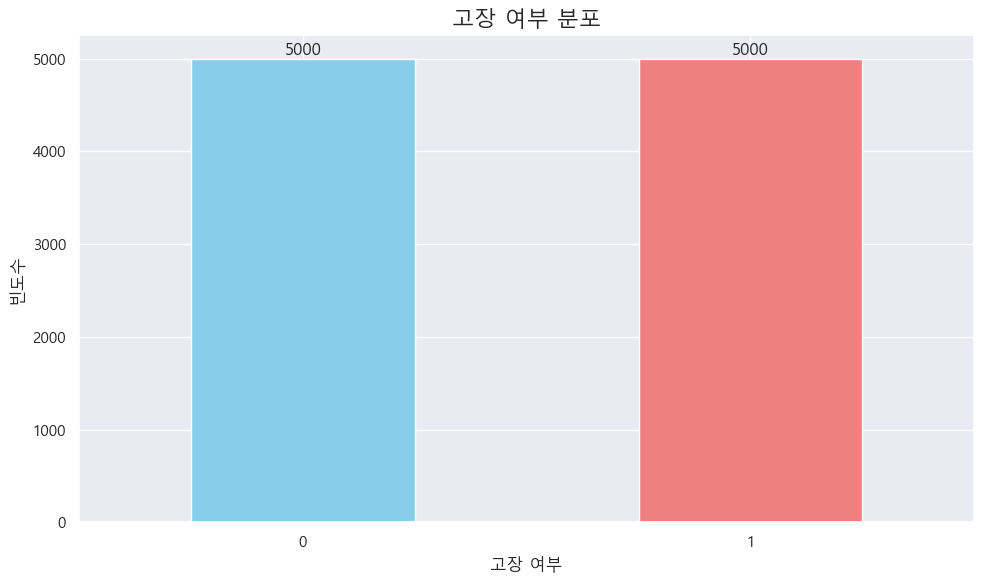

In [915]:
# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 데이터 준비
gojang_counts = df_Bike_latest_2['고장여부'].value_counts()
# 그래프 크기 설정
plt.figure(figsize=(10, 6))
# 막대 그래프 그리기
gojang_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
# 그래프 꾸미기
plt.title('고장 여부 분포', fontsize=16)
plt.xlabel('고장 여부', fontsize=12)
plt.ylabel('빈도수', fontsize=12)
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for i, v in enumerate(gojang_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 결측치 확인

In [918]:
df_Bike_latest_2.isnull().sum()

자전거번호              0
이전일자_1mon          0
등록대여일자             0
고장구분               0
고장여부               0
이상패턴_5min_횟수       0
이전일자_1mon_이용거리    10
이전일자_1mon_이용시간    10
이전일자_1mon_이용횟수    10
dtype: int64

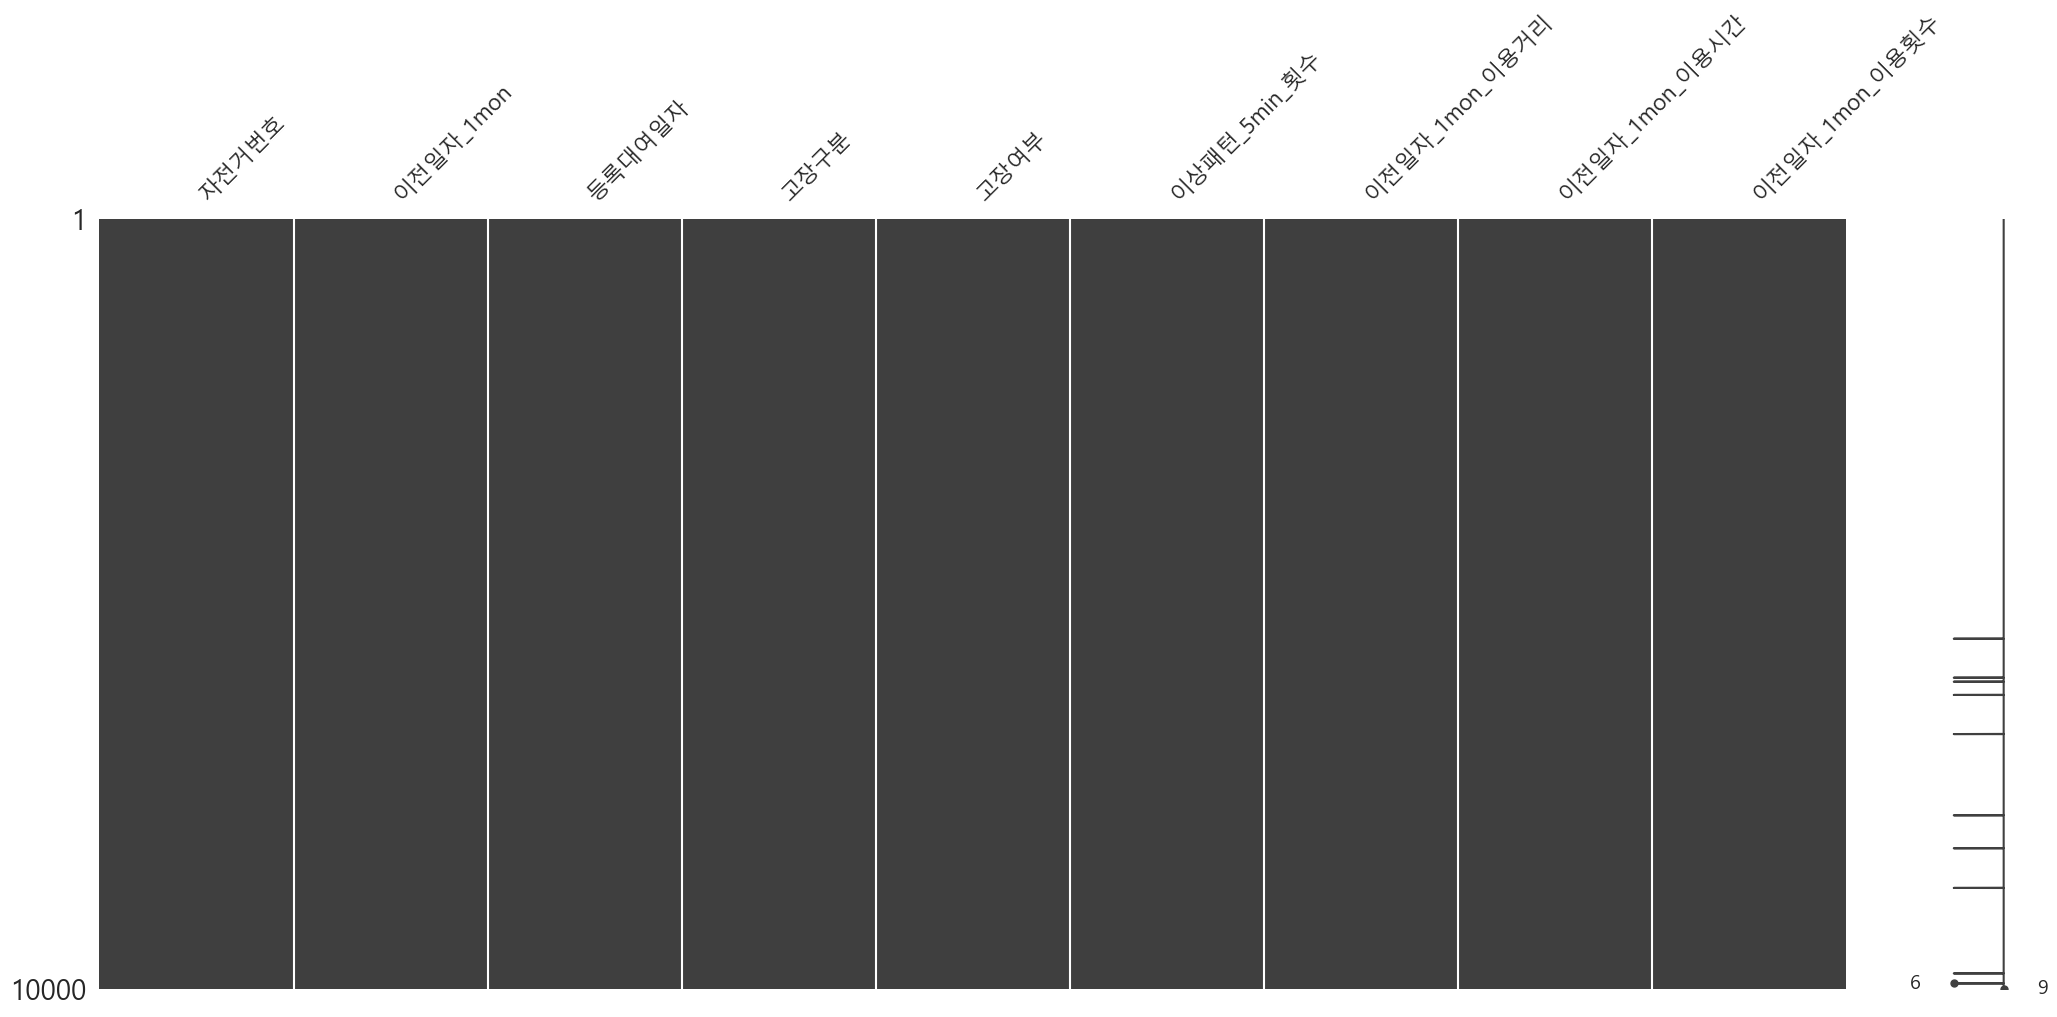

In [920]:
import missingno as msno
# 결측치 매트릭스 시각화
msno.matrix(df_Bike_latest_2)
plt.show()

---
### 중복제거

In [922]:
df_Bike_latest_3 = df_Bike_latest_2.dropna()

---
### subplot multi 함수선언

In [925]:
# 서브플롯 생성 함수
def create_multi_subplot(_df, _columns):
    plt.figure(figsize=(12, 6))
    
    # 전체 데이터에서 x축 범위 계산
    x_min = min(_df[_columns[0]].min(),
                _df[_columns[1]].min(),
                _df[_columns[2]].min())
    x_max = max(_df[_columns[0]].max(),
                _df[_columns[1]].max(),
                _df[_columns[2]].max())

    # 최대 빈도수 계산
    max_count = 0
    for j in [0, 1]:
        for _column in _columns:
            data = _df[_df['고장여부'] == j][_column]
            counts, _ = np.histogram(data, bins=10)
            max_count = max(max_count, counts.max())

    
    position = 1
    for j in list(range(0, 2)):
        for i, _column in enumerate(_columns):
            data = _df[_df['고장여부'] == j][_column]
            title = f'(고장={str(j)}) {_column} 분포'
            xlabel = _column
            _color = 'lightgreen' if j== 1 else 'skyblue'
            
            plt.subplot(2, 3, position)
            sns.histplot(data, bins=10, kde=True, color=_color)
            plt.title(title)
            plt.xlabel(xlabel)
            plt.ylabel('빈도수')
            plt.xlim(x_min, x_max)
            plt.ylim(0, max_count * 1.1)  # y축 범위 통일
            
            # x축의 지수 표현 제거
            #plt.ticklabel_format(axis="x", style="plain")
    
            position = position + 1
    
    plt.tight_layout()
    plt.show()


In [1000]:
# 서브플롯 생성 함수
def create_bi_subplot(_df, _columns):
    plt.figure(figsize=(15, 6))
    
    # 전체 데이터에서 x축 범위 계산
    # x_min = min(_df[_columns[0]].min(),
    #             _df[_columns[1]].min(),
    #             _df[_columns[2]].min())
    # x_max = max(_df[_columns[0]].max(),
    #             _df[_columns[1]].max(),
    #             _df[_columns[2]].max())
    x_min = _df[_columns[0]].min()
    x_max = _df[_columns[0]].max()

    # 최대 빈도수 계산
    # max_count = 0
    # for j in [0, 1]:
    #     for _column in _columns:
    #         data = _df[_df['고장여부'] == j][_column]
    #         counts, _ = np.histogram(data, bins=10)
    #         max_count = max(max_count, counts.max())

    
    position = 1
    for j in list(range(0, 2)):
        for i, _column in enumerate(_columns):
            data = _df[_df['고장여부'] == j][_column]
            title = f'(고장={str(j)}) {_column} 분포'
            xlabel = _column
            _color = 'lightgreen' if j== 1 else 'skyblue'
            
            plt.subplot(1, 2, position)
            sns.histplot(data, bins=10, kde=True, color=_color)
            plt.title(title)
            plt.xlabel(xlabel)
            plt.ylabel('빈도수')
            #plt.xlim(x_min, x_max)
            #plt.ylim(0, max_count * 1.1)  # y축 범위 통일
            
            # x축의 지수 표현 제거
            #plt.ticklabel_format(axis="x", style="plain")
    
            position = position + 1
    
    plt.tight_layout()
    plt.show()

In [929]:
df_Bike_latest_3[df_Bike_latest_3['고장여부'] == 0].head(2)

,자전거번호,이전일자_1mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수
0,SPB-30001,2024-05-28,2024-06-28,,0,5,240874.96,2496.0,161.0
1,SPB-30008,2024-04-20,2024-05-20,,0,0,228641.47,1732.0,87.0


In [931]:
df_Bike_latest_3[df_Bike_latest_3['고장여부'] == 1].head(2)

,자전거번호,이전일자_1mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수
5000,SPB-30006,2024-02-29,2024-03-31,페달,1,2,98170.92,843.0,74.0
5001,SPB-30010,2024-05-18,2024-06-18,타이어,1,5,231653.56,2257.0,121.0


In [933]:
df_Bike_latest_3.sort_values(by = '이전일자_1mon_이용횟수', ascending = False).head(5)

,자전거번호,이전일자_1mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수
2461,SPB-37999,2024-05-30,2024-06-30,,0,8,1172643.34,9934.0,413.0
2990,SPB-41031,2024-05-12,2024-06-12,,0,3,1092647.18,9611.0,401.0
3344,SPB-43063,2024-05-30,2024-06-30,,0,9,974289.16,8566.0,398.0
3091,SPB-41602,2024-05-30,2024-06-30,,0,4,1019600.59,8643.0,383.0
2760,SPB-39601,2024-05-26,2024-06-26,,0,6,1157701.85,9675.0,382.0


In [692]:
grb_Bike_latest_3['이전일자_1mon_이용거리'] = grb_Bike_latest_3['이전일자_1mon_이용거리'].astype(int)
grb_Bike_latest_3['이전일자_1mon_이용시간'] = grb_Bike_latest_3['이전일자_1mon_이용시간'].astype(int)
grb_Bike_latest_3['이전일자_1mon_이용횟수'] = grb_Bike_latest_3['이전일자_1mon_이용횟수'].astype(int)

In [ ]:
# df_Bike_latest_3.columns
_columns = ['이상패턴_5min_횟수',
       '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수']
grb_Bike_latest_3 = df_Bike_latest_3.groupby(['고장여부'])[_columns].agg('mean')

In [680]:
grb_Bike_latest_3.columns

Index(['이상패턴_5min_횟수', '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수'], dtype='object')

In [984]:
grb_Bike_latest_3.isnull().sum()

이상패턴_5min_횟수      0
이전일자_1mon_이용거리    0
이전일자_1mon_이용시간    0
이전일자_1mon_이용횟수    0
dtype: int64

---
## 이상패턴_5min_횟수(고장=1, 고장=0) 시각화

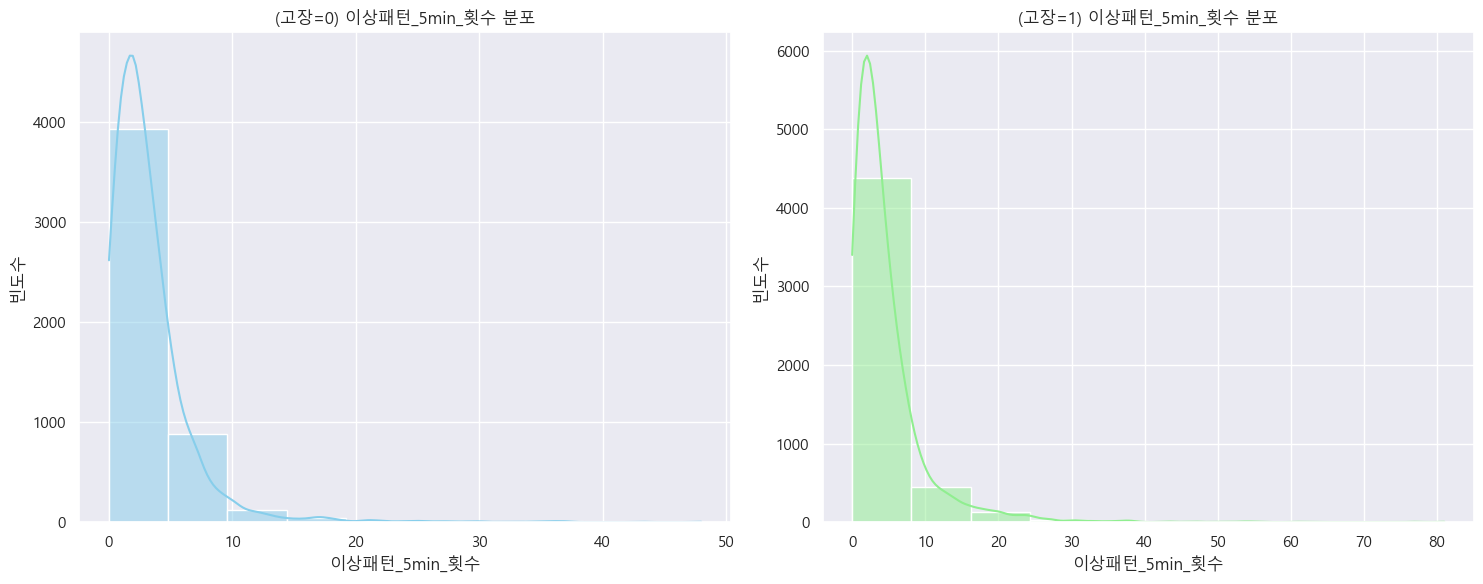

In [1004]:
_columns = ['이상패턴_5min_횟수']
create_bi_subplot(df_Bike_latest_3, _columns)

---
## 이전일자_1mon_이용거리(고장=1, 고장=0) 시각화

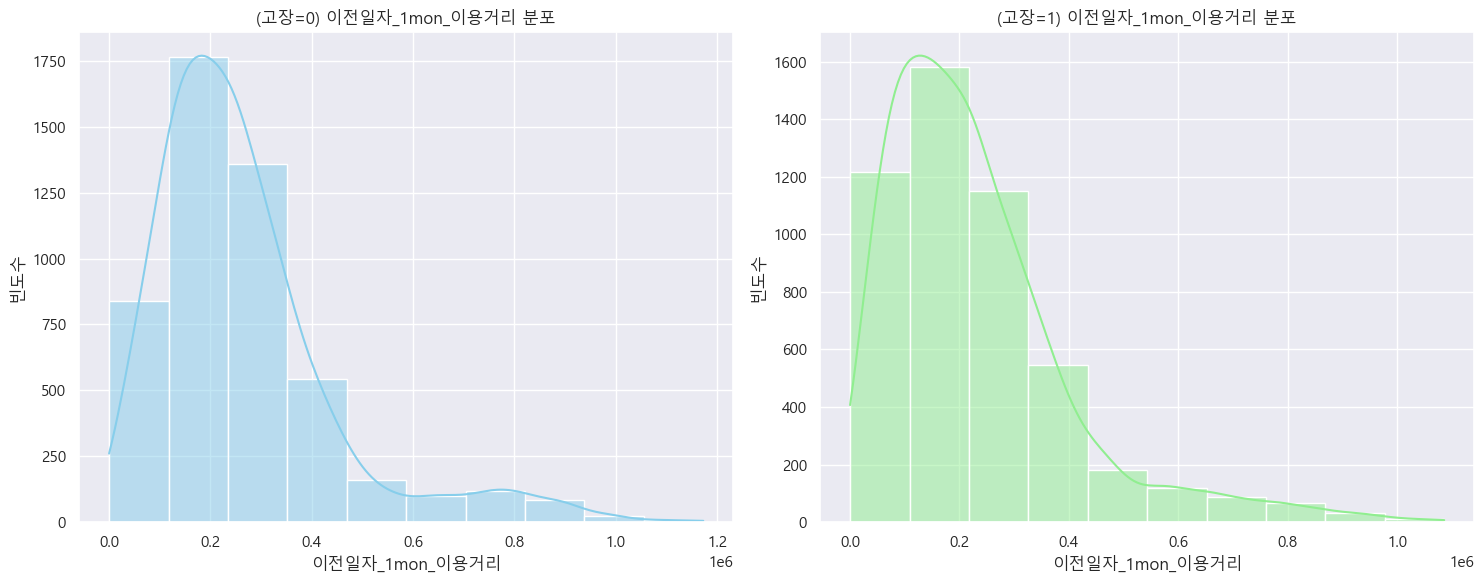

In [1002]:
_columns = ['이전일자_1mon_이용거리']
create_bi_subplot(df_Bike_latest_3, _columns)

---
## 이전일자_1mon_이용시간(고장=1, 고장=0)  시각화

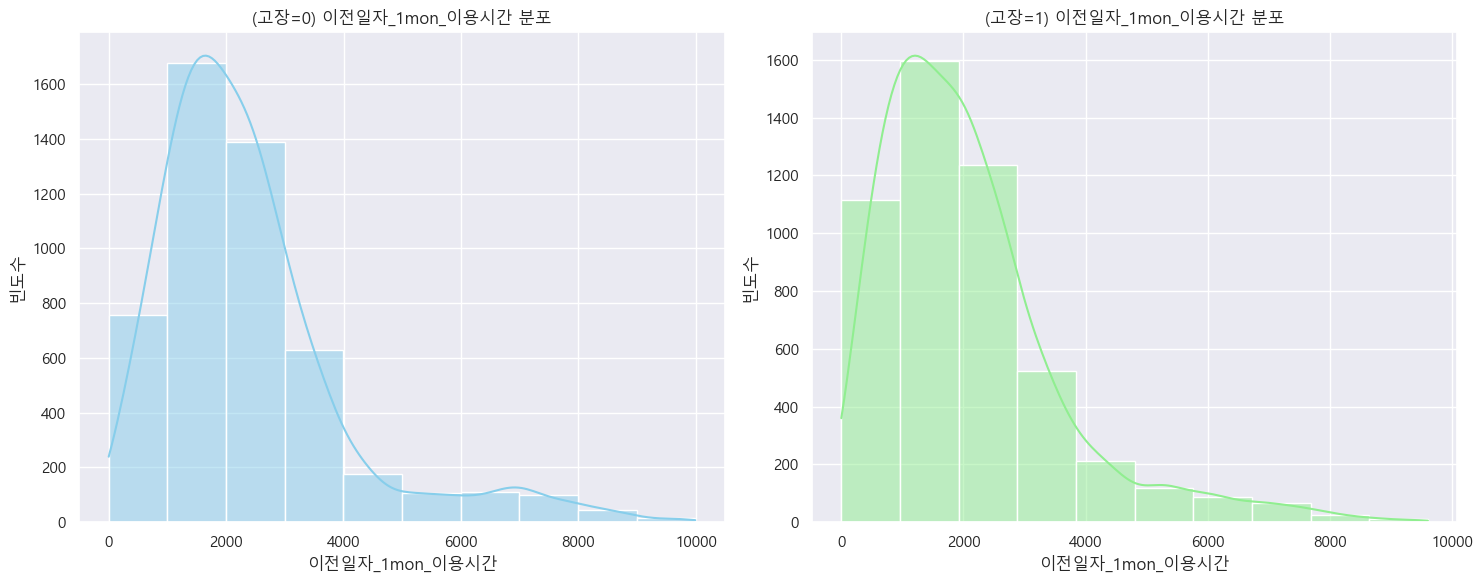

In [1006]:
_columns = ['이전일자_1mon_이용시간']
create_bi_subplot(df_Bike_latest_3, _columns)

---
## 이전일자_1mon_이용횟수(고장=1, 고장=0) 시각화

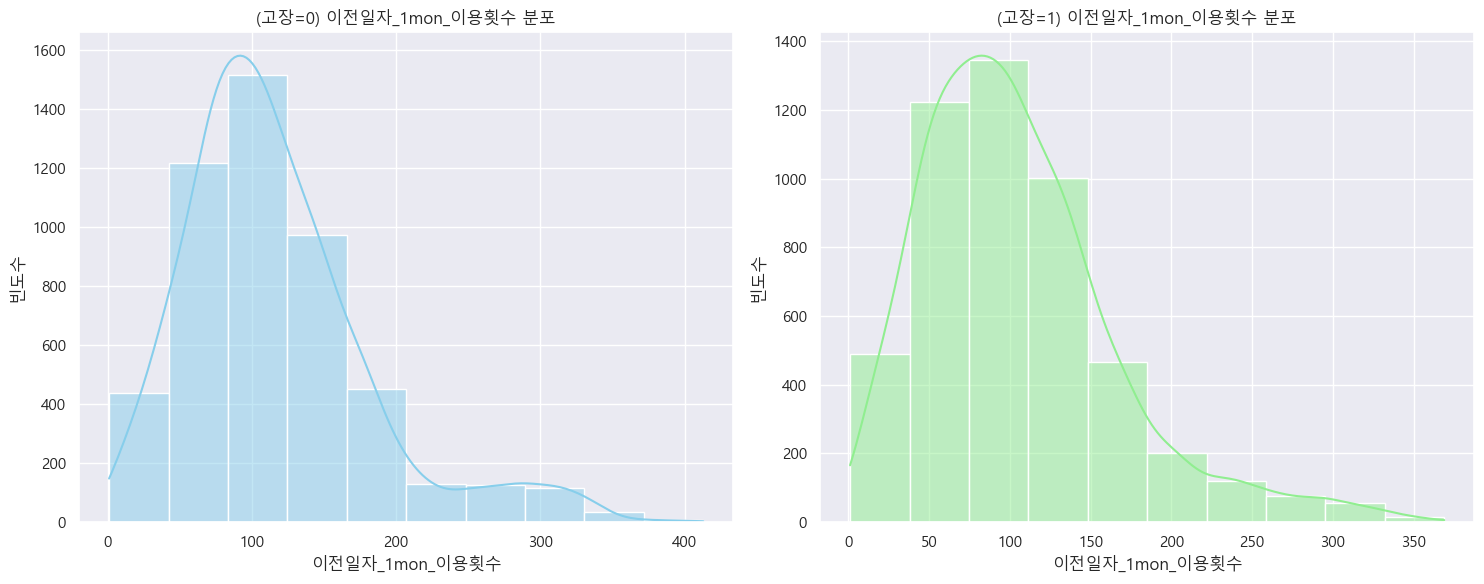

In [1008]:
_columns = ['이전일자_1mon_이용횟수']
create_bi_subplot(df_Bike_latest_3, _columns)

In [947]:
df_Bike_latest_2['이상패턴_5min_횟수'].value_counts().sort_index()[:10]

이상패턴_5min_횟수
0    1056
1    1707
2    1807
3    1522
4    1107
5     777
6     513
7     399
8     246
9     173
Name: count, dtype: int64

In [951]:
# 고장횟수에 따른 고장여부 비율 계산
df_2 = df_Bike_latest_2.groupby('이상패턴_5min_횟수')['고장여부'].value_counts(normalize=True).unstack().reset_index()
df_2.columns = ['이상패턴_5min_횟수', '고장', '정상']
df_2.head(10)

,이상패턴_5min_횟수,고장,정상
0,0,0.553977,0.446023
1,1,0.551845,0.448155
2,2,0.565578,0.434422
3,3,0.526281,0.473719
4,4,0.522132,0.477868
5,5,0.460746,0.539254
6,6,0.419103,0.580897
7,7,0.413534,0.586466
8,8,0.353659,0.646341
9,9,0.352601,0.647399


---
### 시각화 - 이상패턴 <-> 고장여부

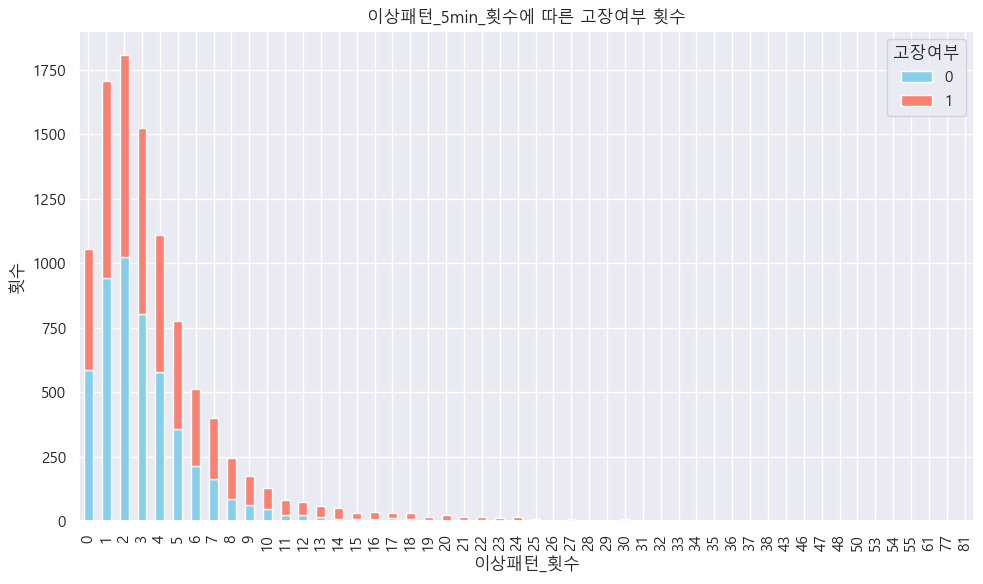

In [1010]:
# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 결과 시각화
result = df_Bike_latest_2.groupby('이상패턴_5min_횟수')['고장여부'].value_counts().unstack().fillna(0)
result.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('이상패턴_횟수')
plt.ylabel('횟수')
plt.title('이상패턴_5min_횟수에 따른 고장여부 횟수')
plt.legend(title='고장여부')
plt.tight_layout()
plt.show()

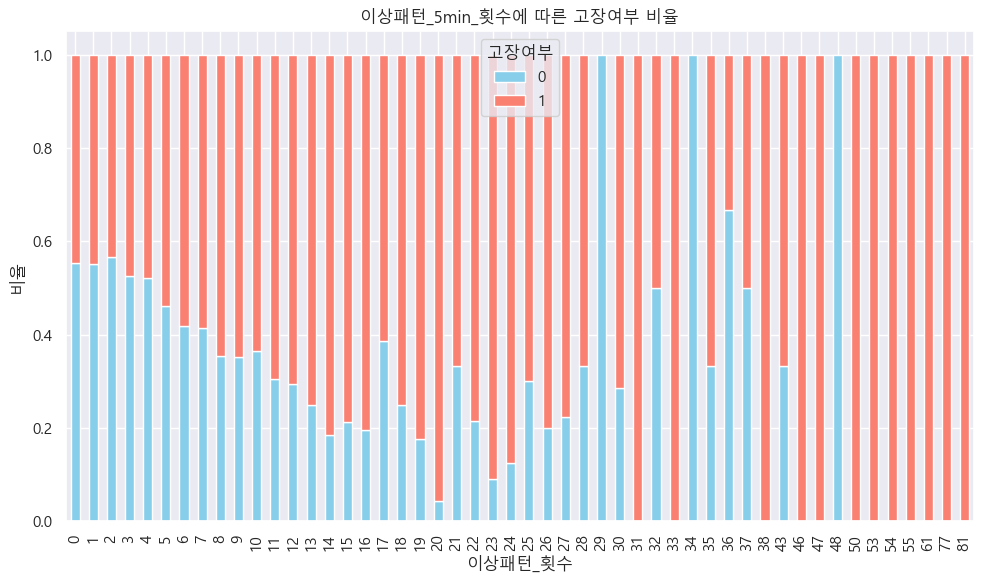

In [955]:
# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 결과 시각화
result = df_Bike_latest_2.groupby('이상패턴_5min_횟수')['고장여부'].value_counts(normalize=True).unstack().fillna(0)
#result = df_Bike_latest_2.groupby('이상패턴_횟수')['고장여부'].value_counts().unstack().fillna(0)
result.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('이상패턴_횟수')
plt.ylabel('비율')
plt.title('이상패턴_5min_횟수에 따른 고장여부 비율')
plt.legend(title='고장여부')
plt.tight_layout()
plt.show()

In [957]:
df_Bike_latest_2.head(5)

,자전거번호,이전일자_1mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수
0,SPB-30001,2024-05-28,2024-06-28,,0,5,240874.96,2496.0,161.0
1,SPB-30008,2024-04-20,2024-05-20,,0,0,228641.47,1732.0,87.0
2,SPB-30032,2024-05-30,2024-06-30,,0,3,66916.90,1216.0,65.0
3,SPB-30055,2024-05-28,2024-06-28,,0,3,169441.86,1834.0,112.0
4,SPB-30058,2024-05-30,2024-06-30,,0,0,237741.17,2018.0,124.0


In [959]:
df_Bike_latest_3 = pd.get_dummies(df_Bike_latest_2, columns=['고장구분'])

In [961]:
df_Bike_latest_3.head(3)

,자전거번호,이전일자_1mon,등록대여일자,고장여부,이상패턴_5min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,고장구분_,고장구분_기타,고장구분_단말기,고장구분_안장,고장구분_체인,고장구분_타이어,고장구분_페달
0,SPB-30001,2024-05-28,2024-06-28,0,5,240874.96,2496.0,161.0,True,False,False,False,False,False,False
1,SPB-30008,2024-04-20,2024-05-20,0,0,228641.47,1732.0,87.0,True,False,False,False,False,False,False
2,SPB-30032,2024-05-30,2024-06-30,0,3,66916.90,1216.0,65.0,True,False,False,False,False,False,False


In [963]:
df_Bike_latest_3.columns
df_Bike_latest_3[['고장여부',
       '이상패턴_5min_횟수', 
       '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수',
       '고장구분_', '고장구분_기타 ', '고장구분_단말기', '고장구분_안장', '고장구분_체인', '고장구분_타이어 ',
       '고장구분_페달']].corr()

,고장여부,이상패턴_5min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,고장구분_,고장구분_기타,고장구분_단말기,고장구분_안장,고장구분_체인,고장구분_타이어,고장구분_페달
고장여부,1.000000,0.150590,-0.092709,-0.090809,-0.090221,-1.000000,0.427799,0.163060,0.299666,0.339412,0.327001,0.196289
이상패턴_5min_횟수,0.150590,1.000000,0.180294,0.185703,0.261426,-0.150590,-0.027137,0.022141,0.127520,0.095820,0.055028,0.005863
이전일자_1mon_이용거리,-0.092709,0.180294,1.000000,0.976582,0.950502,0.092709,-0.048787,-0.024045,-0.056076,0.051814,-0.067354,-0.028478
이전일자_1mon_이용시간,-0.090809,0.185703,0.976582,1.000000,0.953010,0.090809,-0.048222,-0.018069,-0.056603,0.052051,-0.065773,-0.031619
이전일자_1mon_이용횟수,-0.090221,0.261426,0.950502,0.953010,1.000000,0.090221,-0.051004,-0.024893,-0.057659,0.050317,-0.059972,-0.023769
고장구분_,-1.000000,-0.150590,0.092709,0.090809,0.090221,1.000000,-0.427799,-0.163060,-0.299666,-0.339412,-0.327001,-0.196289
고장구분_기타,0.427799,-0.027137,-0.048787,-0.048222,-0.051004,-0.427799,1.000000,-0.069757,-0.128197,-0.145200,-0.139891,-0.083972
고장구분_단말기,0.163060,0.022141,-0.024045,-0.018069,-0.024893,-0.163060,-0.069757,1.000000,-0.048864,-0.055345,-0.053321,-0.032007
고장구분_안장,0.299666,0.127520,-0.056076,-0.056603,-0.057659,-0.299666,-0.128197,-0.048864,1.000000,-0.101710,-0.097991,-0.058821
고장구분_체인,0.339412,0.095820,0.051814,0.052051,0.050317,-0.339412,-0.145200,-0.055345,-0.101710,1.000000,-0.110988,-0.066623


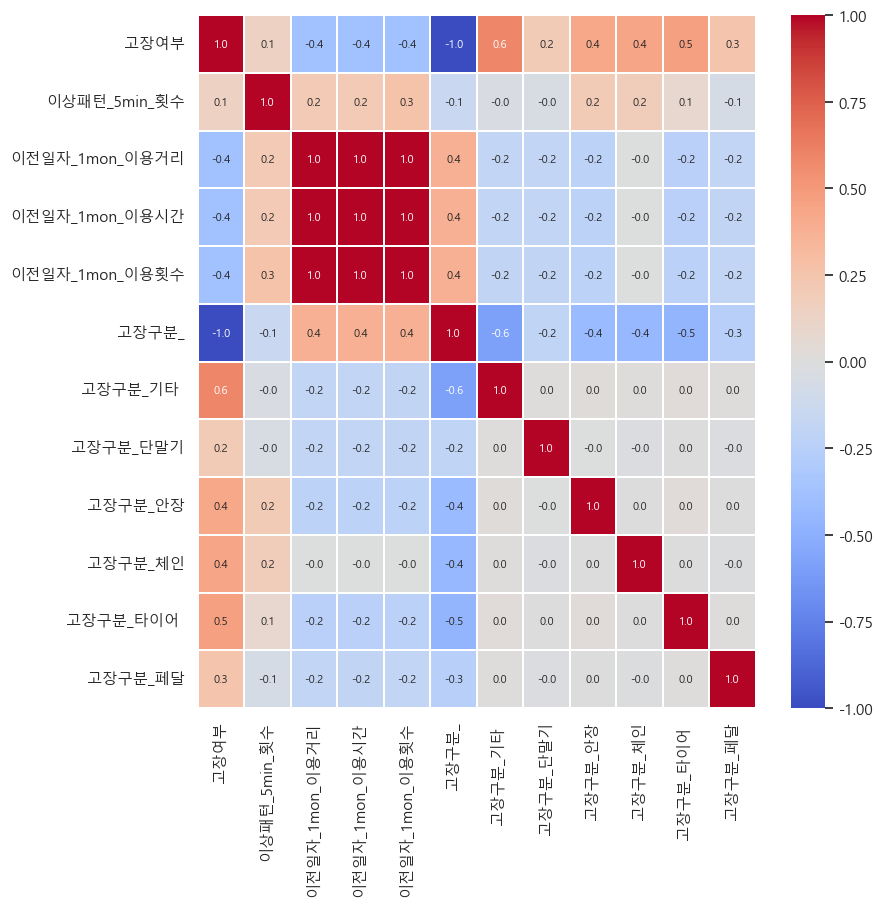

In [965]:
df_Bike_latest_4 = df_Bike_latest_3[['고장여부',
       '이상패턴_5min_횟수',
       '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수',
       '고장구분_', '고장구분_기타 ', '고장구분_단말기', '고장구분_안장', '고장구분_체인', '고장구분_타이어 ',
       '고장구분_페달']].corr()

import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

sns.heatmap(df_Bike_latest_4.corr(),
            annot = True,                     # 상관계수 표시
            annot_kws={"size": 8},
            fmt = '.1f',                      # 상관계수 소수점 자리
            cmap = 'coolwarm',                # 컬러맵 색상 팔레트
            vmax = 1.0,                       # 상관계수 최댓값
            vmin = -1,                       # 상관계수 최소값
            linecolor = 'white',              # 셀 테두리 색상
            linewidths = .005)                 # 셀 간격
sns.set(rc={'figure.figsize' : (9, 9)})       # 그래프 그리기

---
## 선형회귀 모델링

In [171]:
import numpy as np

In [146]:
df_Bike_latest_2.head(3)

,자전거번호,이전일자,등록대여일자,고장구분,고장여부,이상패턴_횟수
0,SPB-30006,2024-01-31,2024-03-31,페달,1,3
1,SPB-30010,2024-04-18,2024-06-18,타이어,1,7
2,SPB-30014,2024-04-24,2024-06-24,기타,1,9


In [148]:
np.array(df_Bike_latest_2['이상패턴_횟수']).reshape(-1, 1)

array([[3],
       [7],
       [9],
       ...,
       [8],
       [3],
       [3]], dtype=int64)

In [150]:
np.array(df_Bike_latest_2['고장여부'])

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

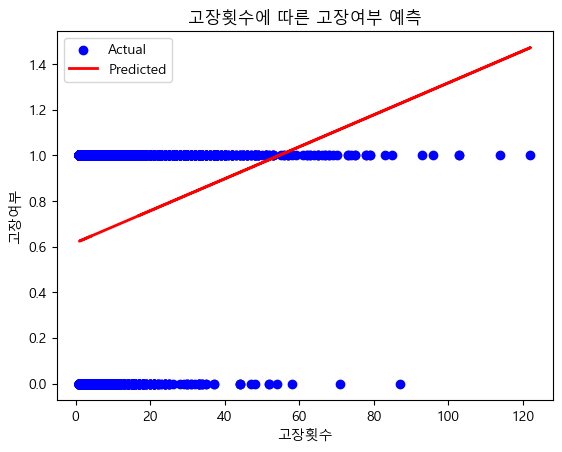

회귀 계수: [0.00700518]
절편: 0.6176931151046378


In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# # 예시 데이터 생성
# # 독립 변수 (예: 고장횟수)
# X = np.array([2, 5, 7, 2, 7]).reshape(-1, 1)
# # 종속 변수 (예: 고장여부)
# y = np.array([1, 1, 1, 1, 1])

df_Bike_latest_3 = df_Bike_latest_2[df_Bike_latest_2['이상패턴_횟수'] > 0]
X = np.array(df_Bike_latest_3['이상패턴_횟수']).reshape(-1, 1)
y = np.array(df_Bike_latest_3['고장여부'])

# 데이터셋을 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# 결과 시각화
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('고장횟수')
plt.ylabel('고장여부')
plt.title('고장횟수에 따른 고장여부 예측')
plt.legend()
plt.show()

# 회귀 계수 출력
print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

In [97]:
df_Bike_latest_3[['이상패턴_10min_횟수', '이전일자_1mon_이용거리', '고장여부']]

,이상패턴_10min_횟수,이전일자_1mon_이용거리,고장여부
0,2,98170.92,1
1,5,231653.56,1
2,9,335138.54,1
3,2,291259.65,1
4,7,253399.66,1
...,...,...,...
41891,1,35200.00,0
41892,7,23153.80,0
41893,4,60815.51,0
41894,1,26810.00,0


In [85]:
np.array(df_Bike_latest_3[['이상패턴_10min_횟수', '이전일자_1mon_이용거리']]).reshape(-1, 2)

array([[2.0000000e+00, 9.8170920e+04],
       [5.0000000e+00, 2.3165356e+05],
       [9.0000000e+00, 3.3513854e+05],
       ...,
       [4.0000000e+00, 6.0815510e+04],
       [1.0000000e+00, 2.6810000e+04],
       [3.0000000e+00, 6.1996220e+04]])

In [101]:
df_Bike_latest_3.isnull().mean()

자전거번호             0.000000
이전일자_1mon         0.000000
이전일자_2mon         0.000000
이전일자_3mon         0.000000
등록대여일자            0.000000
고장구분              0.000000
고장여부              0.000000
이상패턴_5min_횟수      0.000000
이상패턴_7min_횟수      0.000000
이상패턴_10min_횟수     0.000000
이전일자_1mon_이용거리    0.001432
이전일자_1mon_이용시간    0.001432
이전일자_1mon_이용횟수    0.001432
이전일자_2mon_이용거리    0.001146
이전일자_2mon_이용시간    0.001146
이전일자_2mon_이용횟수    0.001146
이전일자_3mon_이용거리    0.000883
이전일자_3mon_이용시간    0.000883
이전일자_3mon_이용횟수    0.000883
dtype: float64

In [103]:
df_Bike_latest_3_2 = df_Bike_latest_3.dropna()

In [127]:
df_Bike_latest_3_2.shape[0]

41836

In [105]:
df_Bike_latest_3_2.isnull().sum()

자전거번호             0
이전일자_1mon         0
이전일자_2mon         0
이전일자_3mon         0
등록대여일자            0
고장구분              0
고장여부              0
이상패턴_5min_횟수      0
이상패턴_7min_횟수      0
이상패턴_10min_횟수     0
이전일자_1mon_이용거리    0
이전일자_1mon_이용시간    0
이전일자_1mon_이용횟수    0
이전일자_2mon_이용거리    0
이전일자_2mon_이용시간    0
이전일자_2mon_이용횟수    0
이전일자_3mon_이용거리    0
이전일자_3mon_이용시간    0
이전일자_3mon_이용횟수    0
dtype: int64

---
## 로지스틱회귀 모델링

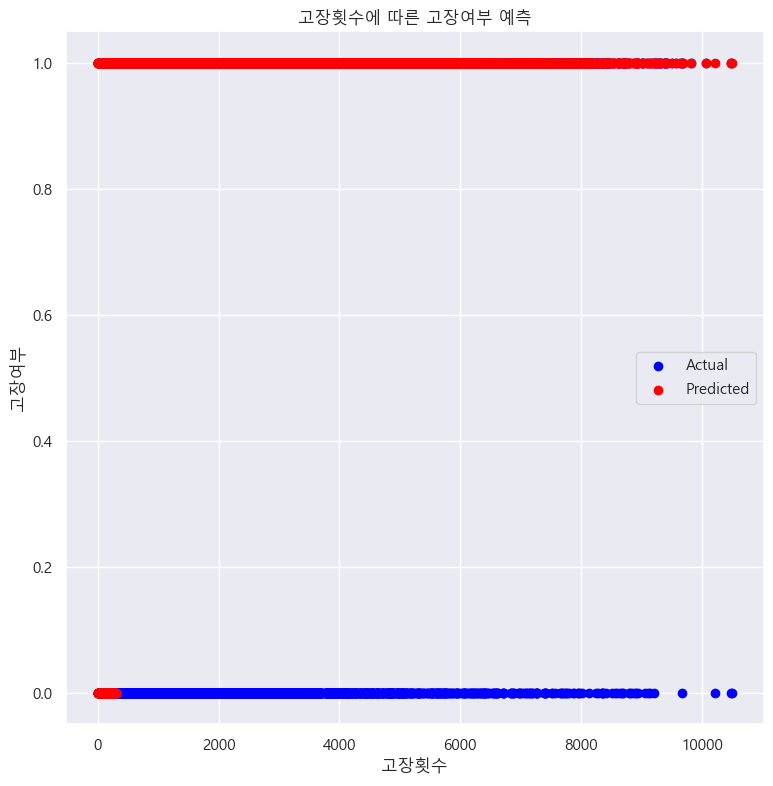

테스트 세트 정확도: 0.6823613766730402


In [967]:
# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수'
X = np.array(df_Bike_latest_3_2[['이상패턴_5min_횟수', '이전일자_1mon_이용시간']]).reshape(-1, 2)
y = np.array(df_Bike_latest_3_2['고장여부'])

# 데이터셋을 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=444, stratify=y)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 결과 시각화
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 1], y_pred, color='red', label='Predicted')
plt.xlabel('고장횟수')
plt.ylabel('고장여부')
plt.title('고장횟수에 따른 고장여부 예측')
plt.legend()
plt.show()

# 모델 평가
print('테스트 세트 정확도:', model.score(X_test, y_test))

In [969]:
# 회귀 계수 출력
print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

회귀 계수: [[0.11016824 0.00012247]]
절편: [-0.03711066]


### [ 이상패턴 횟수 == 0 ] 것들의 고장여부 비율

In [972]:
counts = df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] == 0]['고장여부'].value_counts()
total = counts.sum()   # 총 데이터 개수
percentage = counts / total * 100   # 비율 계산
print(f'total : {total}')
print(f'counts : {counts}')
print(f'percentage : {percentage}')

total : 1056
counts : 고장여부
0    585
1    471
Name: count, dtype: int64
percentage : 고장여부
0    55.397727
1    44.602273
Name: count, dtype: float64
